#### 학습 결과 분석 : 예측 결과 확인

In [ ]:
vib_predict = vib_model.predict(vib_train_dataset)
vib_predict.shape

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(1758, 512, 1)

In [ ]:
cur_predict = cur_model.predict(cur_train_dataset)
cur_predict.shape

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(8170, 1024, 1)

#### 진동) 원본 데이터와 예측 데이터 비교

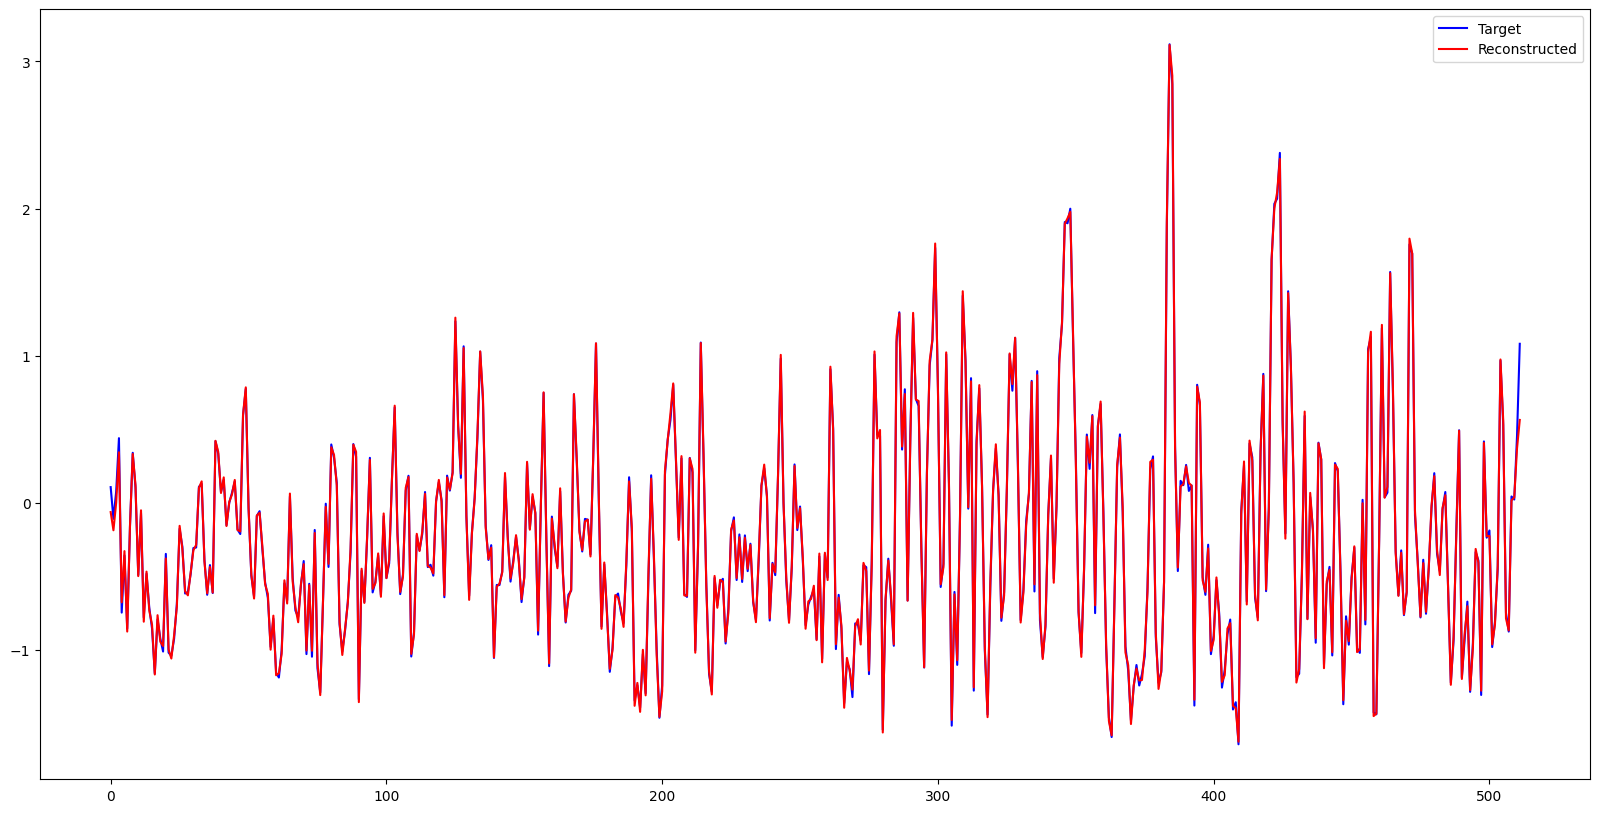

In [ ]:
 plt.figure(figsize=(20,	10))
 plt.plot(vib_train_dataset[0],	color='blue',	label='Target')
 plt.plot(vib_predict[0],	color='red',	label='Reconstructed')
 plt.legend()
 plt.show()

#### 전류) 원본 데이터와 예측 데이터 비교

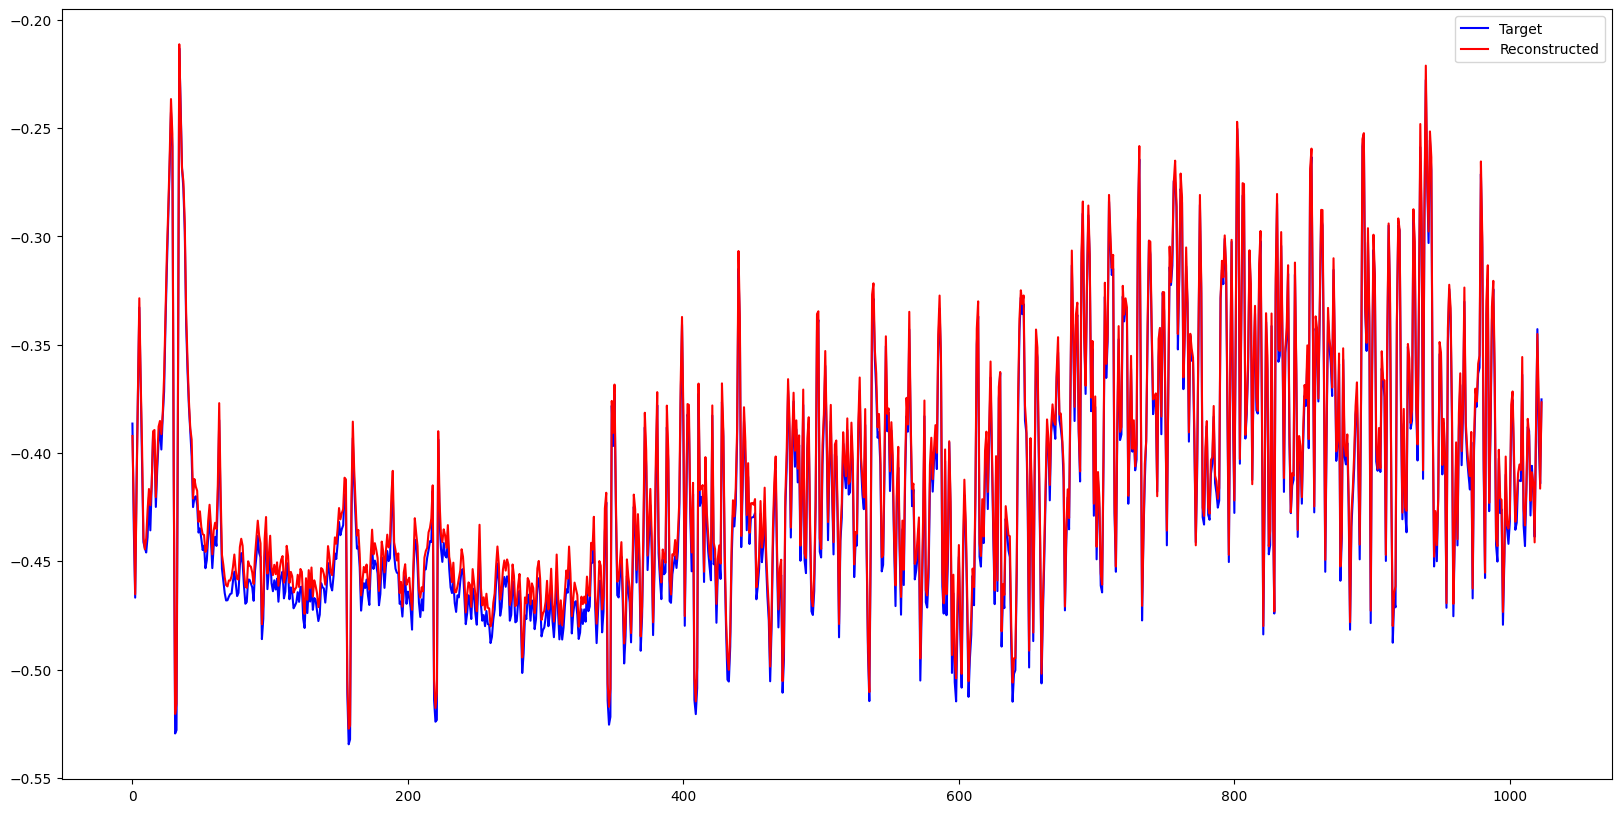

In [ ]:
plt.figure(figsize=(20,	10))
plt.plot(cur_train_dataset[0],	color='blue',	label='Target')
plt.plot(cur_predict[0],	color='red', label='Reconstructed')
plt.legend()
plt.show()

## 임계치 설정


### 복원 오차 확인 : Reconstruction Error
- 복원 오차를 쓰는 이유
 -  지금 현재 AutoEncoder 기반 모델은 이상을 감지할때, 현재 학습한 모델의 정상 데이터의 패턴을 기억하고 있음
  - 따라서, 새로운 데이터가 들어오면 모델은 같은 데이터를 인코딩(압축)하고 디코딩하여 복원함 -> 이때 복원한 값이 입력했던 값이랑 차이가 크면, 이상으로 간주함
  - 왜 차이가 날까? 모델은 정상 패턴만 학습했기에 이상한 입력치에 익숙치 않음

In [ ]:
vib_mae	=	np.mean(np.abs(vib_predict - vib_train_dataset),	axis=1)
vib_mae

array([[0.02067102],
       [0.0179927 ],
       [0.02198426],
       ...,
       [0.02163333],
       [0.02170912],
       [0.02297898]])

In [ ]:
cur_mae	=	np.mean(np.abs(cur_predict - cur_train_dataset),	axis=1)
cur_mae

array([[0.00583389],
       [0.00588067],
       [0.00564264],
       ...,
       [0.00564962],
       [0.00564523],
       [0.00591523]])

### 임계치 설정

진동, 전류 학습 데이터셋 분포 확인

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


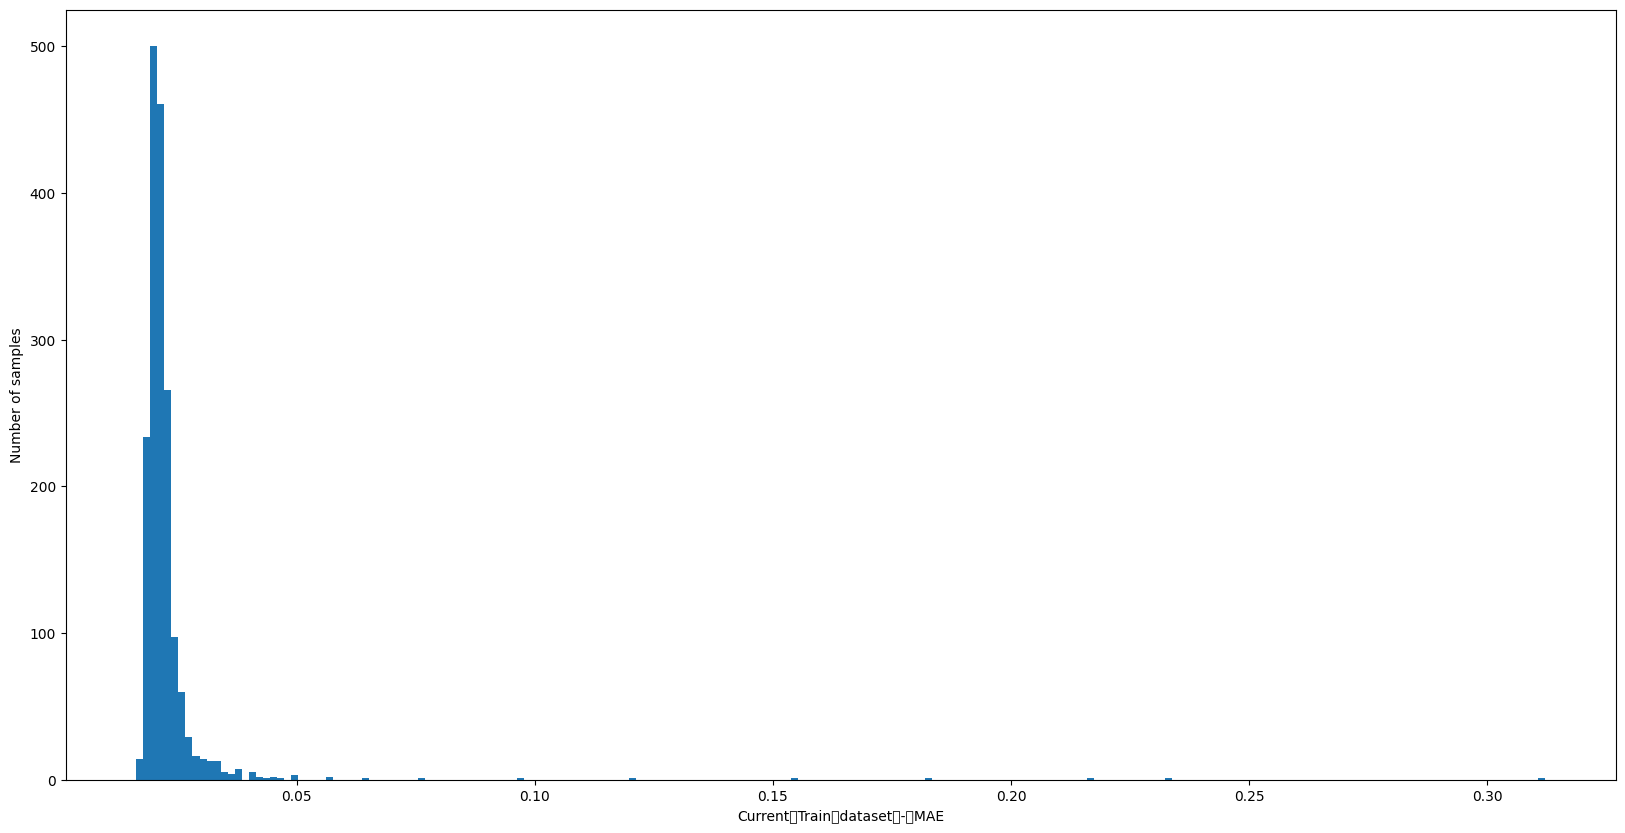

In [ ]:
plt.figure(figsize=(20,	10))
plt.hist(x=vib_mae,	bins=200)
plt.xlabel('Current	Train	dataset	-	MAE')
plt.ylabel('Number of samples')
plt.show()

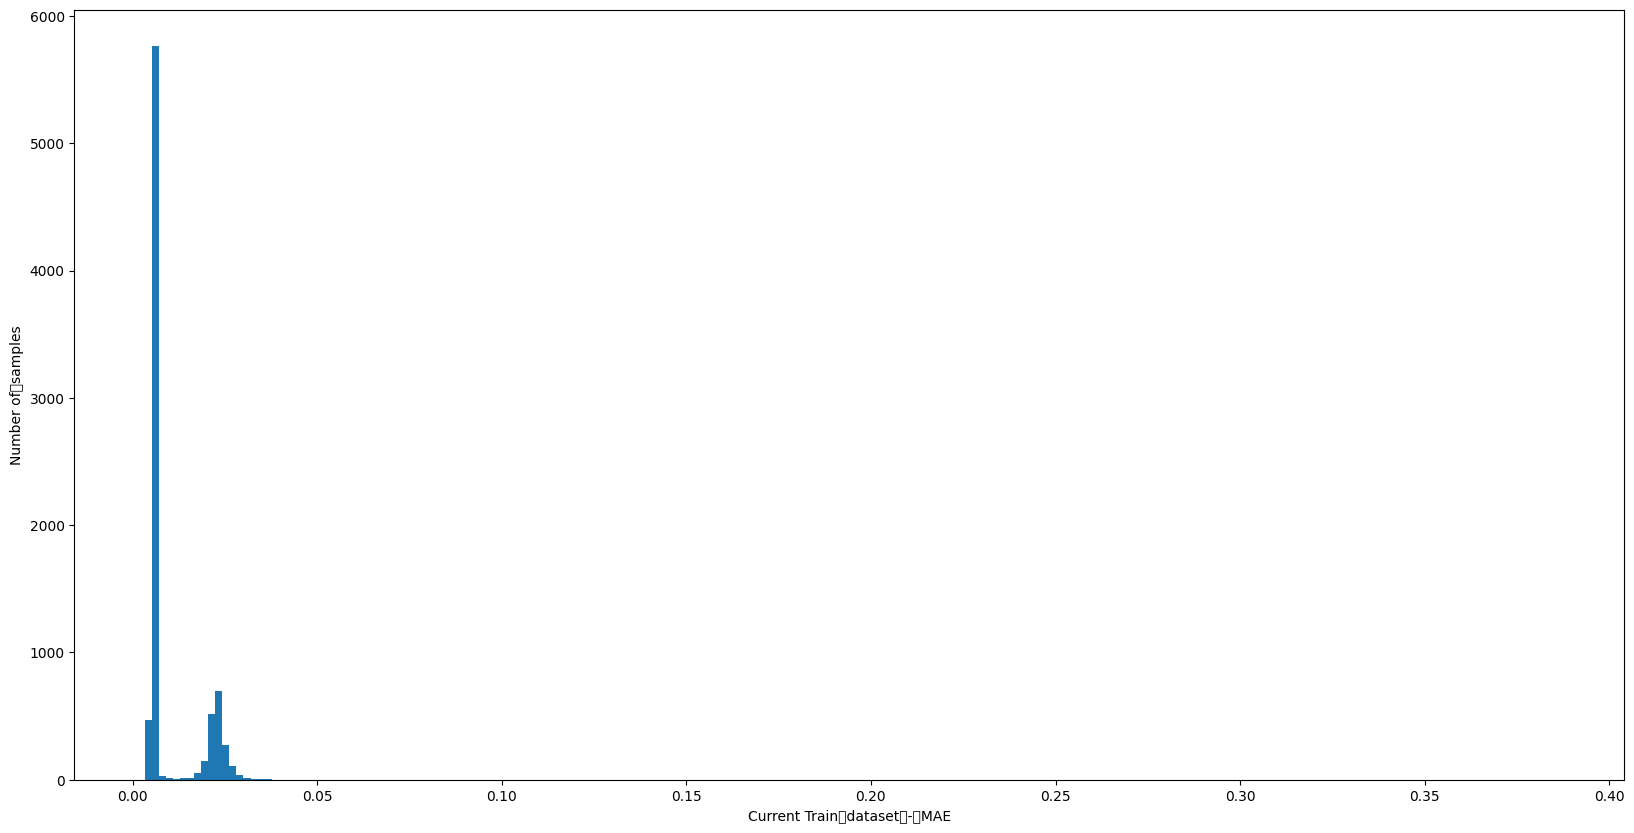

In [ ]:
plt.figure(figsize=(20,	10))
plt.hist(x=cur_mae,	bins=200)
plt.xlabel('Current Train	dataset	-	MAE')
plt.ylabel('Number of	samples')
plt.show()

임계치 설정 : 3시그마 규칙으로 임계치 결정하기
- 3시그마 규칙 ? 평균에서 3 표준편차 범위

In [ ]:
 vib_threshold	=	np.mean(vib_mae)	+	3	*	np.std(vib_mae)
 cur_threshold	=	np.mean(cur_mae)	+	3	*	np.std(cur_mae)
 print('진동 데이터 임계치:',	vib_threshold)
 print('전류 데이터 임계치:',	cur_threshold)

진동 데이터 임계치: 0.05869300426723094
전류 데이터 임계치: 0.03709558137545027


학습에 사용된 데이터의 복원오차와 임계치 시각화
- 대부분의 데이터가 임계치 보다 낮음을 확인할 수 있음

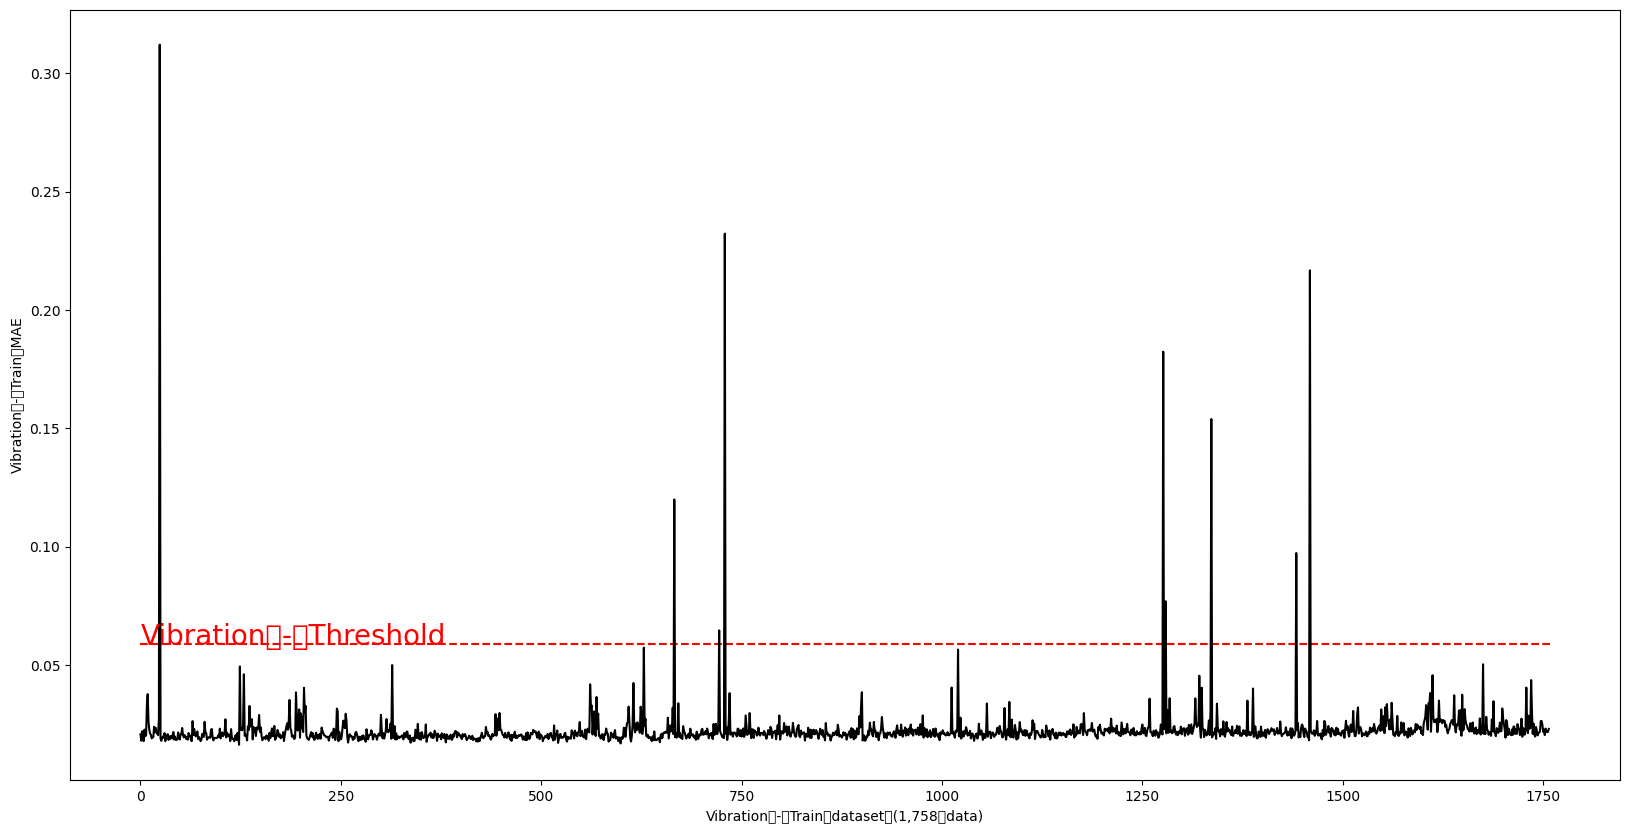

In [ ]:
plt.figure(figsize=(20,	10))
plt.text(x=0,	y=vib_threshold,	s='Vibration	-	Threshold',	fontsize=20,	color='red')
plt.hlines(y=vib_threshold,	xmin=0,	xmax=len(vib_mae),	color='red',	linestyle='--')
plt.xlabel('Vibration	-	Train	dataset	(1,758	data)')
plt.ylabel('Vibration	-	Train	MAE')
plt.plot(vib_mae,	color='black')
plt.show()

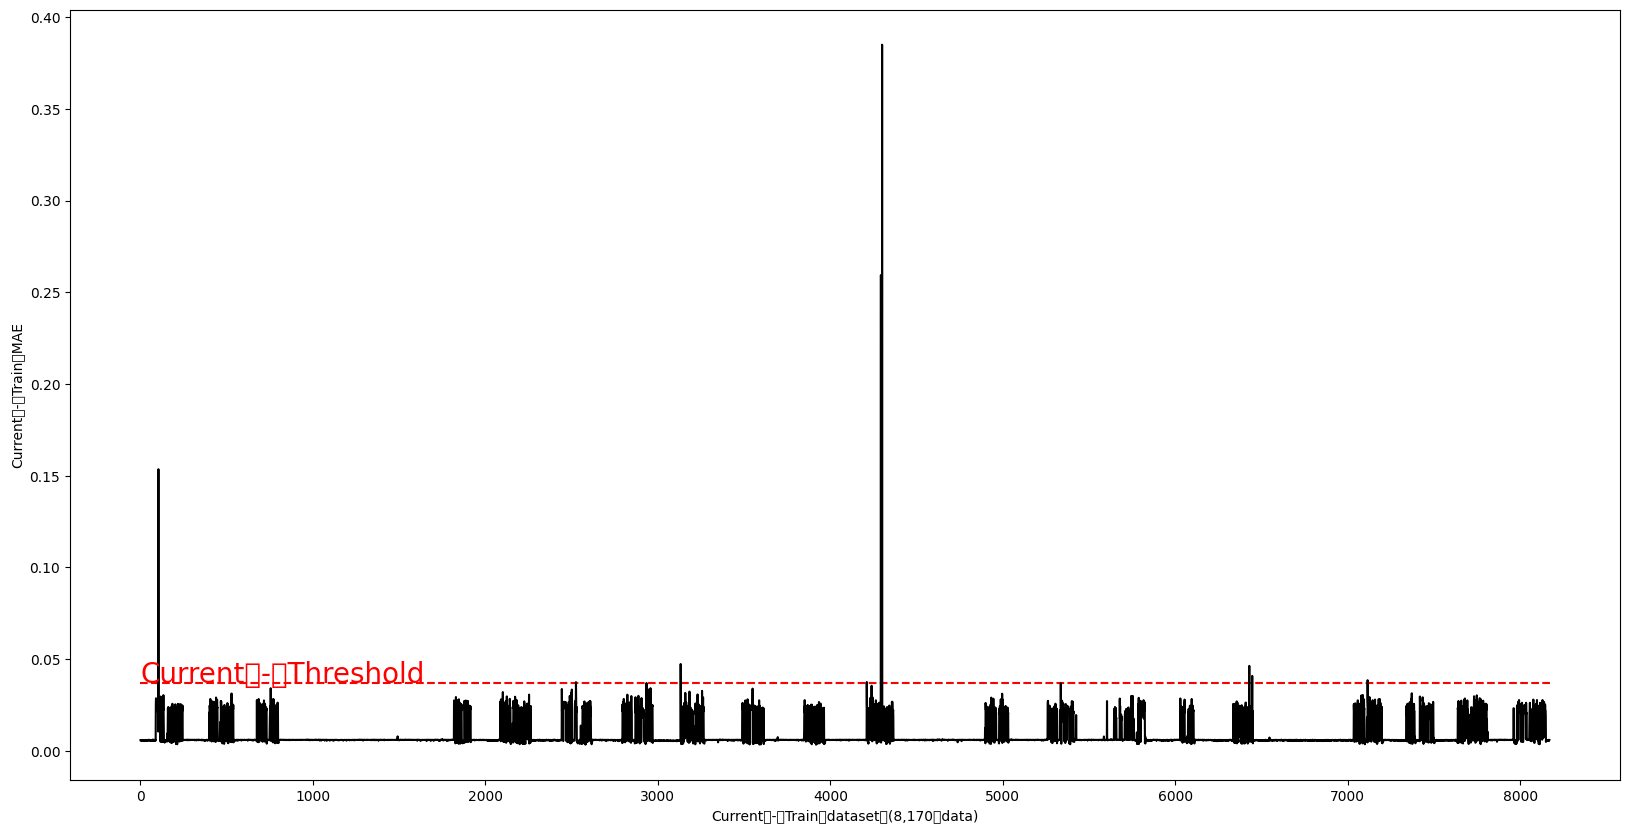

In [ ]:
 plt.figure(figsize=(20,	10))
 plt.text(x=0,	y=cur_threshold,	s='Current	-	Threshold',	fontsize=20,	color='red')
 plt.hlines(y=cur_threshold,	xmin=0,	xmax=len(cur_mae),	color='red',	linestyle='--')
 plt.xlabel('Current	-	Train	dataset	(8,170	data)')
 plt.ylabel('Current	-	Train	MAE')
 plt.plot(cur_mae,	color='black')
 plt.show()